In [8]:
import chess
import chess.engine
import random
import numpy as np

# Creates a Random Board
def random_board(max_depth=12):
  board = chess.Board()
  depth = random.randrange(0, max_depth)

  for _ in range(depth):
    all_moves = list(board.legal_moves)
    random_move = random.choice(all_moves)
    board.push(random_move)
    if board.is_game_over():
      break
  return board

# Gives score to position of white. Checks steps ahead by using depth.
def stockfish(board, depth):
  with chess.engine.SimpleEngine.popen_uci('C:/Users/Mohamed - Khadar/Documents/stockfish_14.1_win_x64_avx2/stockfish_14.1_win_x64_avx2') as sf:
    result = sf.analyse(board, chess.engine.Limit(depth=depth))
    score = result['score'].white().score()

    return score

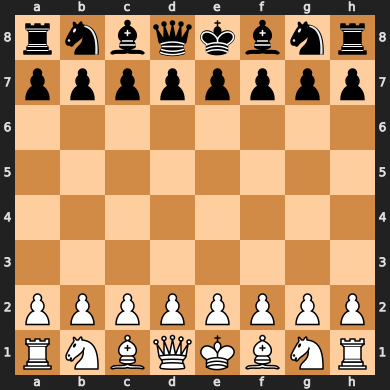

In [9]:
board = random_board()
board

In [10]:
stockfish(board, 10)

35

In [15]:
squares_index = {
    'a' : 0,
    'b' : 1,
    'c' : 2,
    'd' : 3,
    'e' : 4,
    'f' : 5,
    'g' : 6,
    'h' : 7
}

# example: h3 -> 17
def square_to_index(square):
    letter = chess.square_name(square)
    return 8 - int(letter[1]), squares_index[letter[0]]

def split_dims():
    # 14 boards incl attacking ranges for both sides
    board3d = np.zeros((14,8,8), dtype=np.int8)
    for piece in chess.PIECE_TYPES:
        for square in board.pieces(piece,chess.WHITE):
            idx = np.unravel_index(square,(8,8))
            #per board
            board3d[piece-1][7-idx[0]][idx[1]] = 1
        for square in board.pieces(piece,chess.BLACK):
            idx = np.unravel_index(square,(8,8))
            board3d[piece+5][7-idx[0]][idx[1]] = 1

    turn = board.turn
    board.turn = chess.WHITE
    for move in board.legal_moves:
        i, j = square_to_index(move.to_square)
        board3d[12][i][j] = 1
    board.turn = chess.BLACK
    for move in board.legal_moves:
        i, j = square_to_index(move.to_square)
        board3d[13][i][j] = 1
    board.turn = turn
    return board3d
    
split_dims()

array([[[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        

In [16]:
from tensorflow import keras
model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
#makes guess optimizer  loss calculates how good or bad.
model.compile(optimizer='sgd',loss='mean_squared_error')

xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0], dtype=float)
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0], dtype=float)

model.fit(xs,ys,epochs=500)

print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 143ms/step - loss: 47.2076
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 37.5240
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 29.8976
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 23.8897
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 19.1555
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 15.4235
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 12.4800
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 10.1572
Epoch 9/500
1/1 [==============================] - 0s 999us/step - loss: 8.3227
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 6.8726
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 5.7251
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 4.8157
Epoch 13/500
1/1 [==============================]